In [1]:
!pip install opendatasets


In [7]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
import torchvision.transforms as transforms
# from torchvision.datasets import Imageforlder
import torchvision.datasets as datasets
from torch.utils.data import  random_split, DataLoader
import random
from skimage import io
import matplotlib.pyplot as plt
# para opendataset
import opendatasets as od
from fastai.vision.all import *

import torch
import torchvision

device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
# Descargamos el dataset
dataset_link = "https://www.kaggle.com/datasets/nightfury007/fercustomdataset-3classes"
od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: carlososmar
Your Kaggle Key: ··········


100%|██████████| 83.1M/83.1M [00:04<00:00, 17.8MB/s]


In [ ]:
# regNet = models.regnet_y_128gf();
# regNet = models.regnet_y_400mf();
# regNet = models.regnet_y_800mf();
# regNet = models.regnet_y_3_2gf();
# regNet = models.regnet_y_1_6gf();
# regNet = models.regnet_y_8gf();
# regNet = models.regnet_y_16gf();
# regNet = models.regnet_y_32gf();
# regNet = models.regnet_x_400mf();
# regNet = models.regnet_x_800mf();
# regNet = models.regnet_y_32gf();
# regNet = models.regnet_y_32gf();
# regNet = models.regnet_y_32gf();
# regNet

In [17]:

dataset_dir = "/content/fercustomdataset-3classes/FER_Custom_Dataset"

# Transformaciones al dataset
transform = transforms.Compose([
    # reafirmamos las dimenciones
    transforms.Resize((100, 100)),
    transforms.ToTensor(),
    transforms.Normalize(mean = (0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])


# Dataset procesado de imagenes almacenadas en folders que lleva por nombre su respectivo label

dataset = datasets.ImageFolder(root= dataset_dir, transform = transform)


# número baches
batch_size= 64


dataloader_ = DataLoader(dataset, batch_size, shuffle= True, pin_memory = True)
print(dataset.classes)



# Calcula el tamaño del conjunto de prueba en función de la proporción
test_size = int(0.2 * len(dataloader_.dataset))

# Calcula el tamaño del conjunto de entrenamiento
train_size = len(dataloader_.dataset) - test_size

# Divide el conjunto de datos en entrenamiento y prueba
train_dataset, test_dataset = random_split(dataloader_.dataset, [train_size, test_size])

# Crea DataLoaders para Test y Train
batch_size = 64
dataloader = {
    'train': DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True),
    'test': DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)
}



['Disappointed', 'interested', 'neutral']


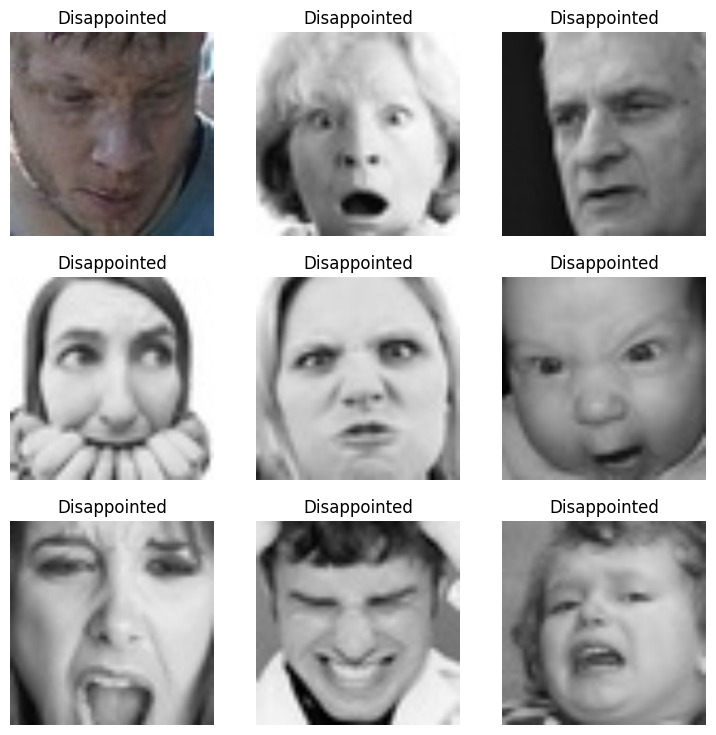

In [14]:
path = Path('/content/fercustomdataset-3classes/FER_Custom_Dataset/Disappointed')
dls = ImageDataLoaders.from_folder(path, train='train',
                                   item_tfms=Resize(224),valid_pct=0.2,
                                   bs=64,seed=0)
dls.show_batch()

In [15]:
from tqdm import tqdm
import numpy as np

def fit(model, dataloader, epochs=5):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = torch.nn.CrossEntropyLoss()
    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")
        bar = tqdm(dataloader['test'])
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")


In [24]:
regNet = models.regnet_x_400mf(weights = None)
fit(regNet, dataloader)

val_loss 1.01262 val_acc 0.48249: 100%|██████████| 137/137 [00:12<00:00, 11.35it/s]


Epoch 1/5 loss 1.10717 val_loss 1.01262 acc 0.42147 val_acc 0.48249


val_loss 0.96157 val_acc 0.51884: 100%|██████████| 137/137 [00:12<00:00, 11.33it/s]


Epoch 2/5 loss 0.97932 val_loss 0.96157 acc 0.51083 val_acc 0.51884


val_loss 0.90564 val_acc 0.56188: 100%|██████████| 137/137 [00:12<00:00, 11.13it/s]


Epoch 3/5 loss 0.90932 val_loss 0.90564 acc 0.55985 val_acc 0.56188


val_loss 0.89121 val_acc 0.54352: 100%|██████████| 137/137 [00:11<00:00, 11.80it/s]


Epoch 4/5 loss 0.84839 val_loss 0.89121 acc 0.59773 val_acc 0.54352


val_loss 0.86184 val_acc 0.57687: 100%|██████████| 137/137 [00:12<00:00, 11.38it/s]

Epoch 5/5 loss 0.79663 val_loss 0.86184 acc 0.62777 val_acc 0.57687


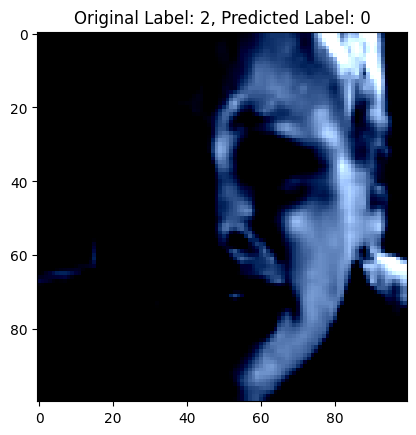

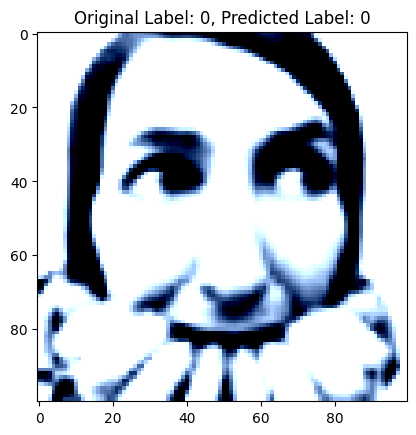

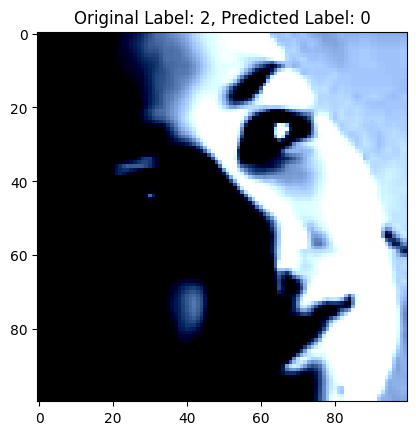

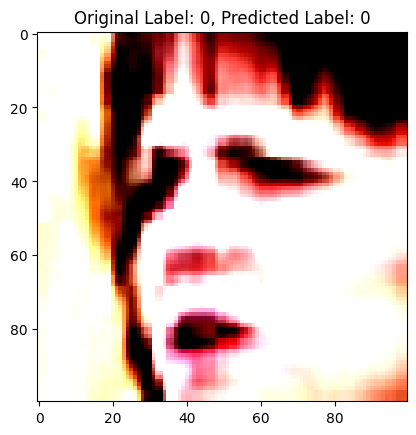

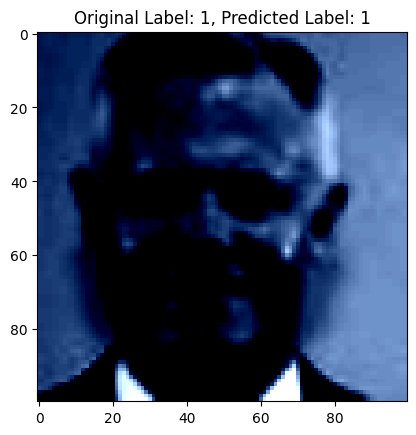

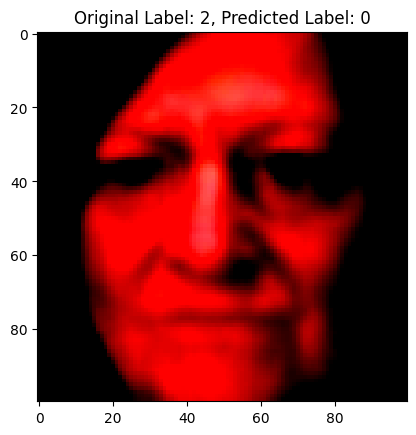

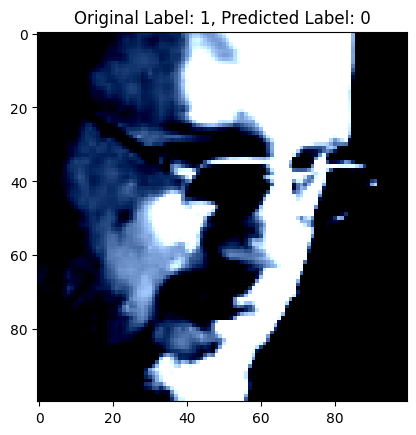

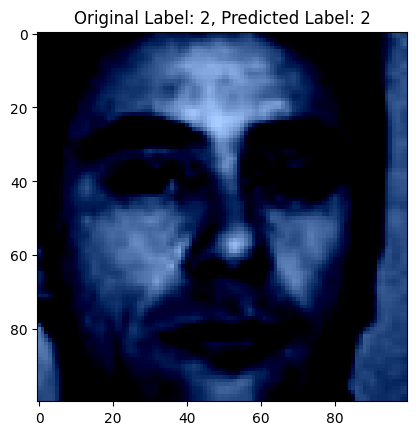

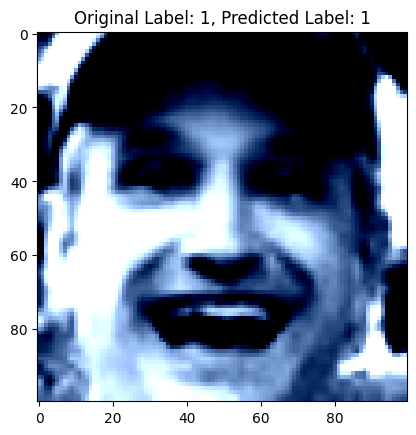

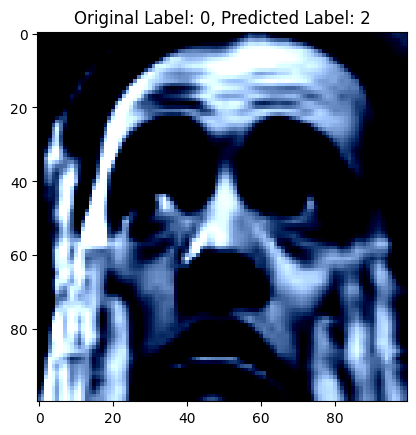

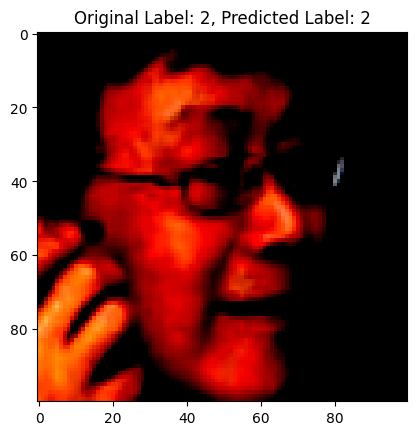

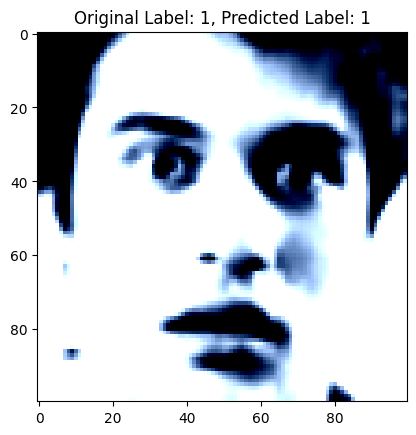

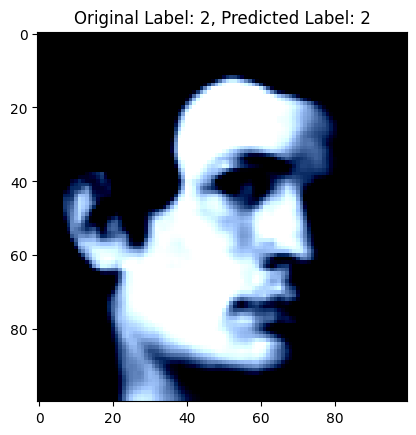

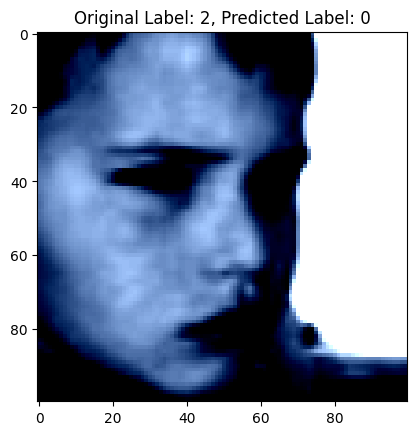

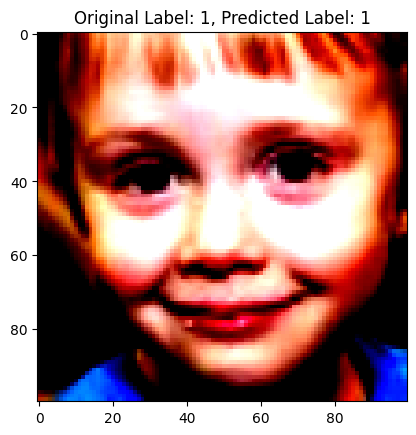

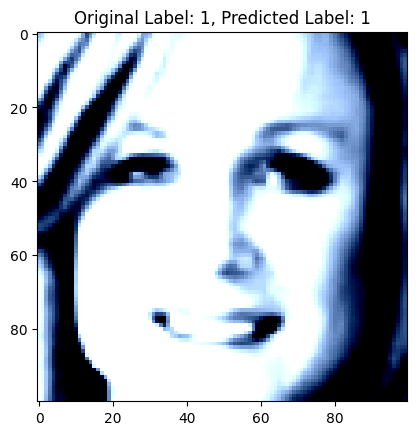

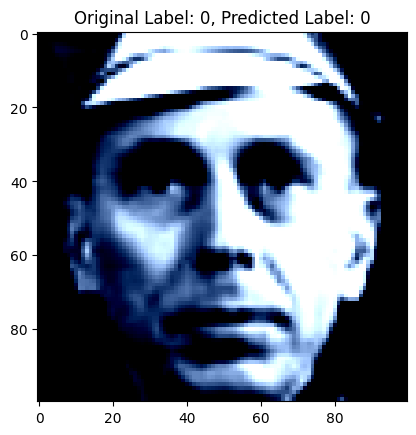

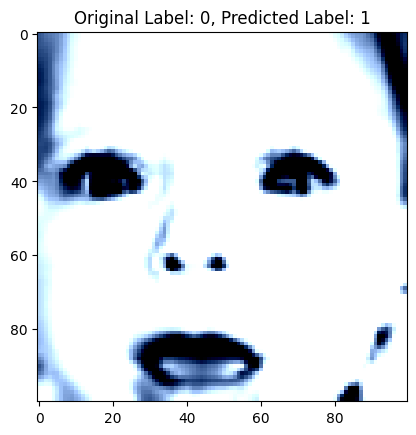

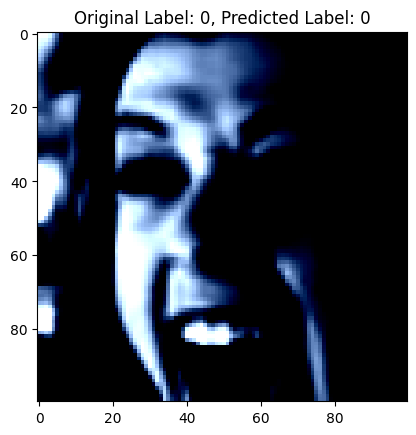

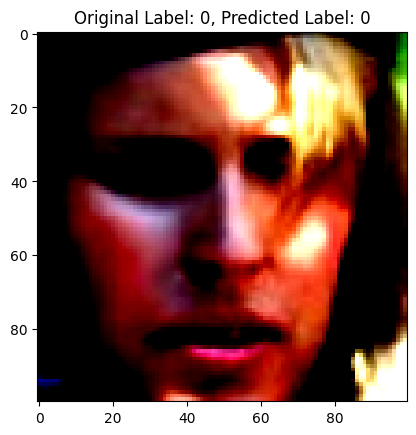

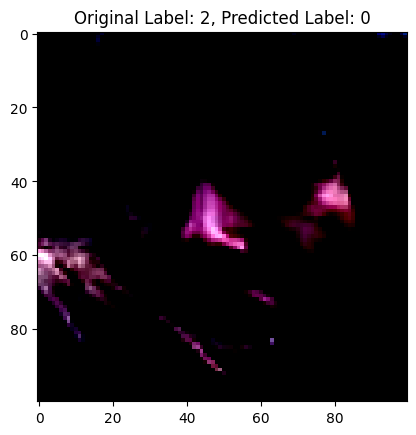

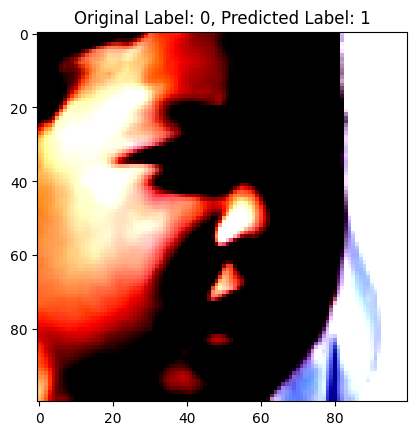

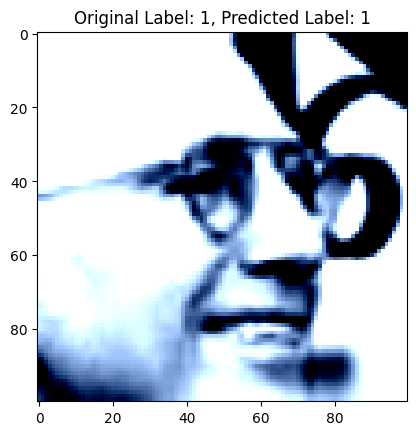

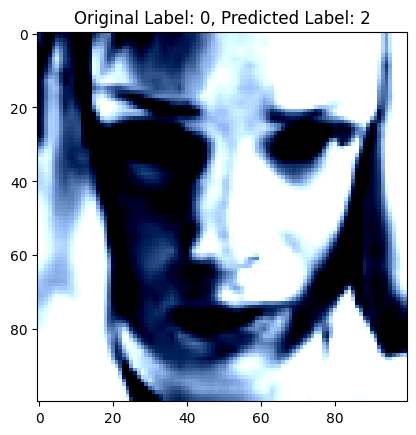

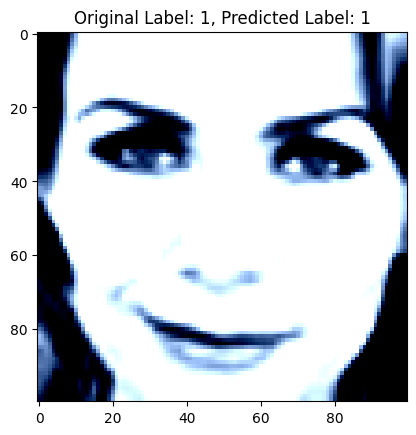

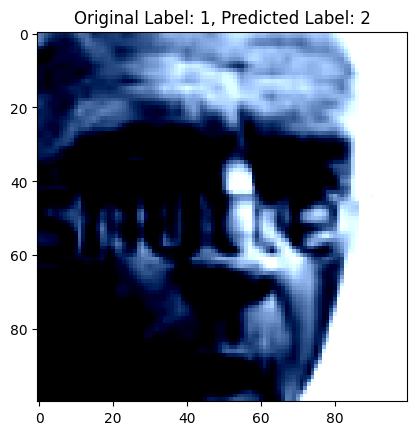

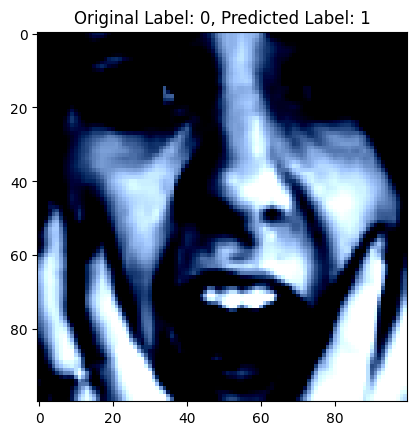

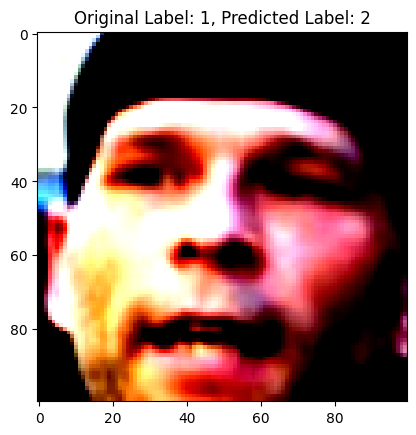

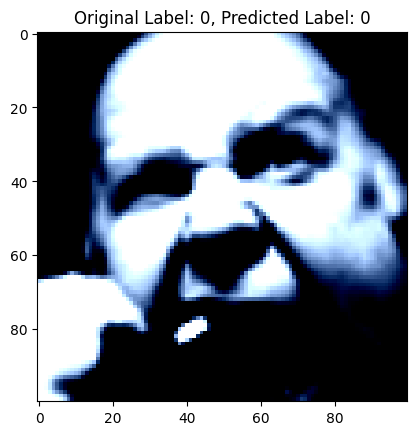

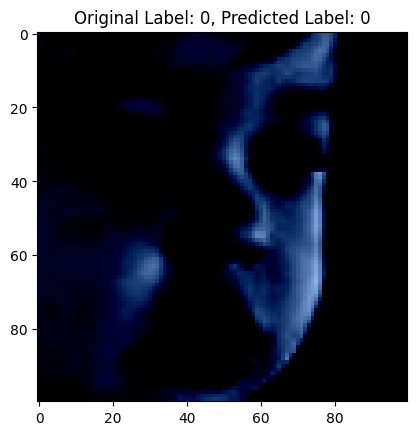

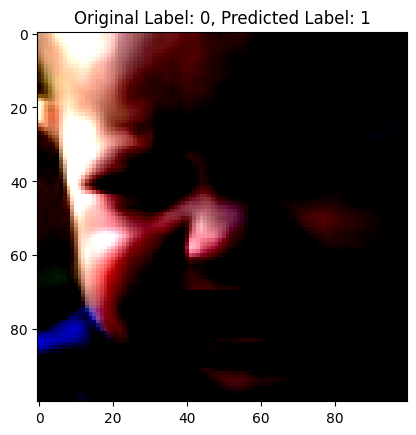

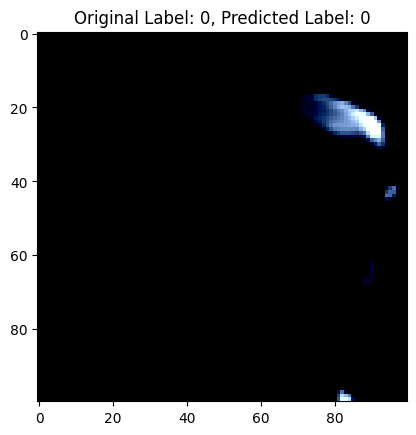

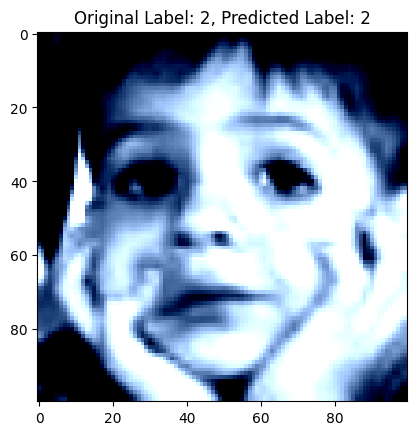

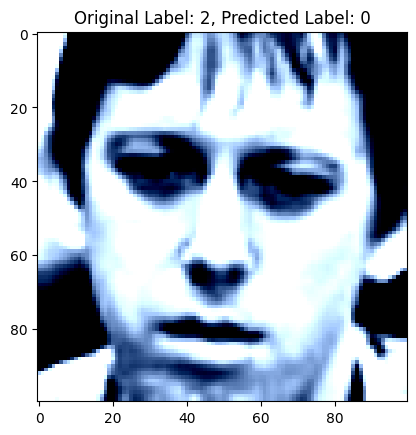

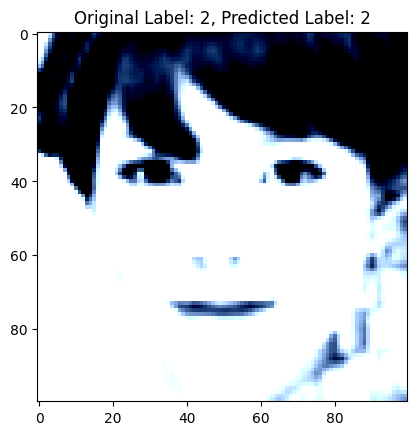

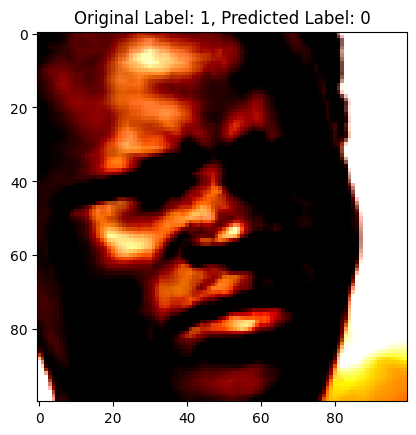

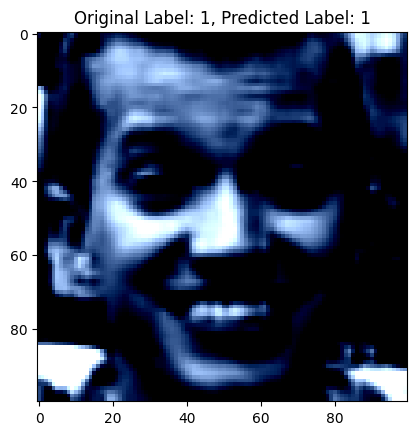

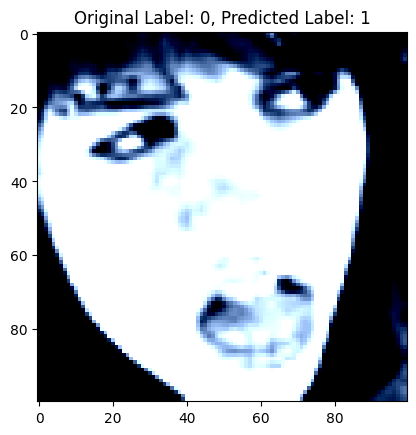

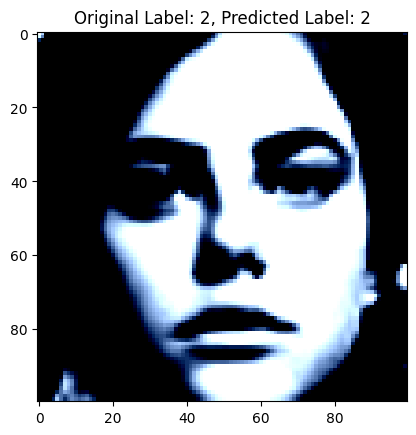

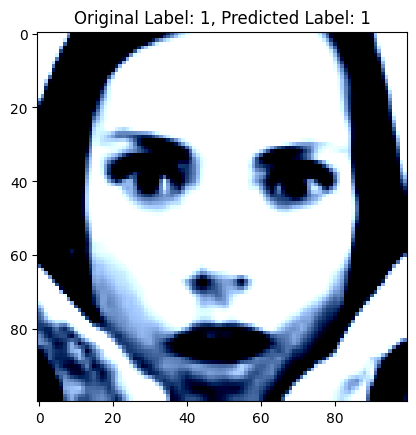

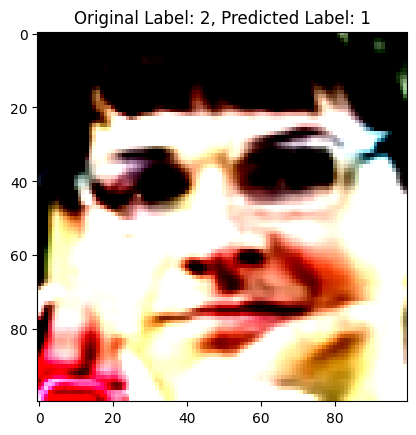

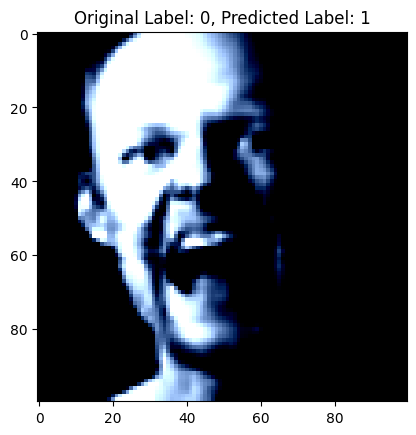

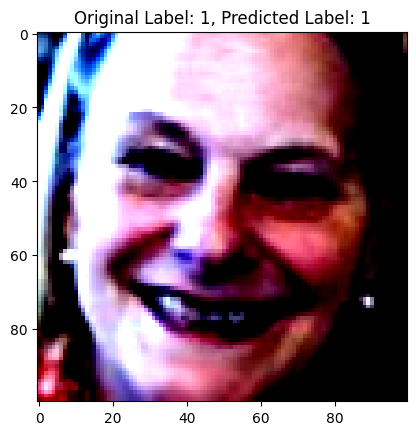

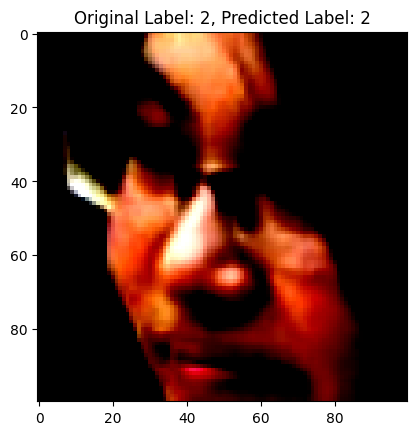

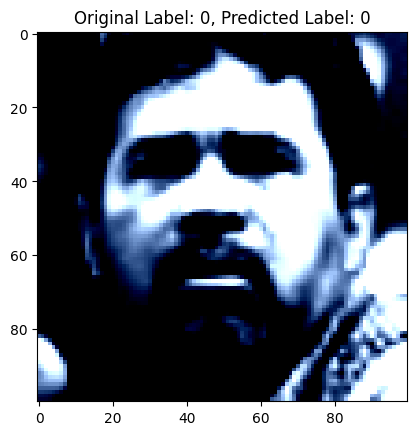

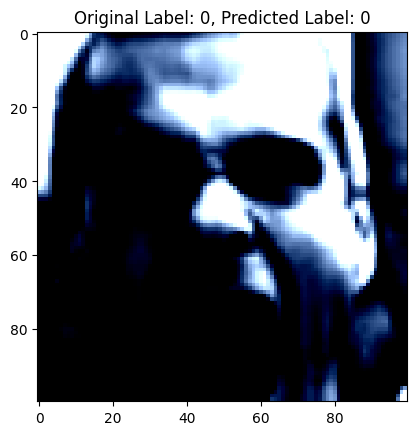

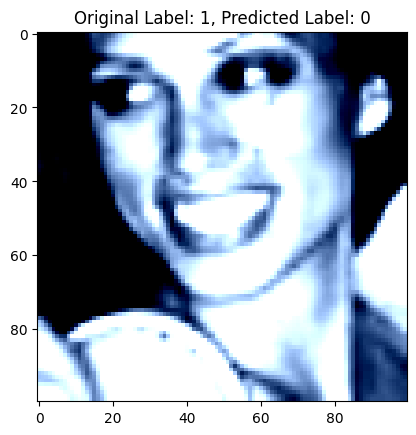

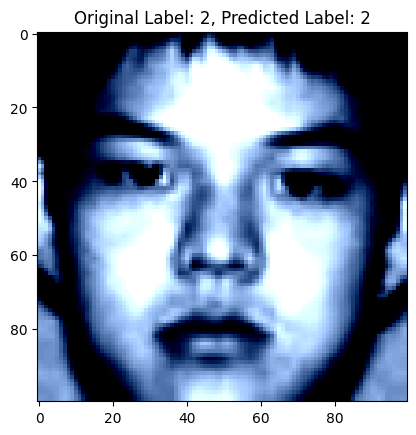

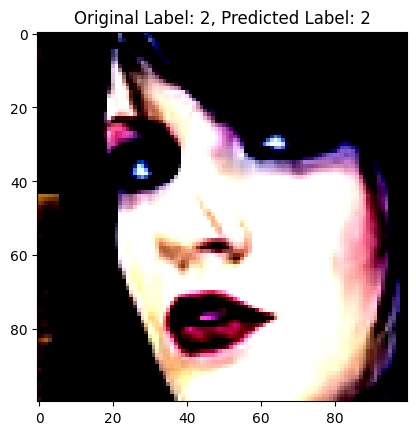

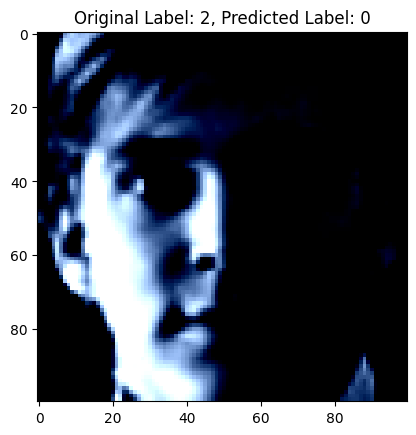

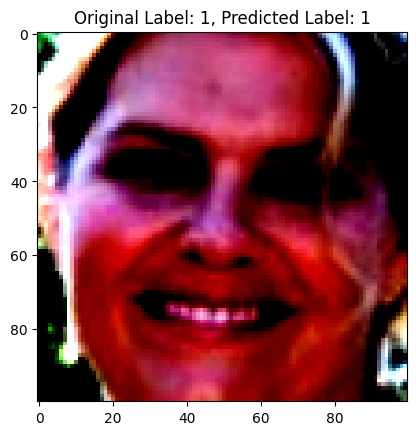

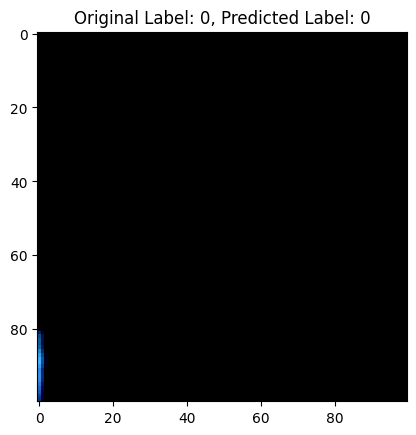

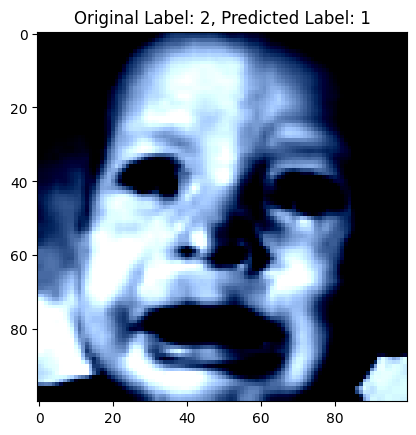

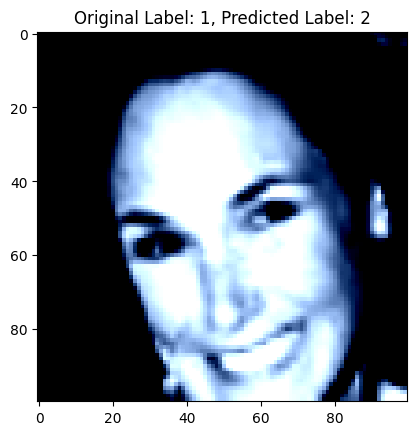

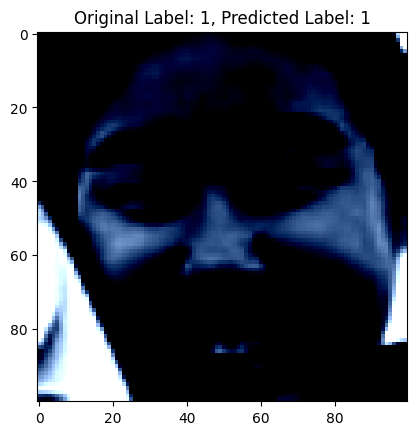

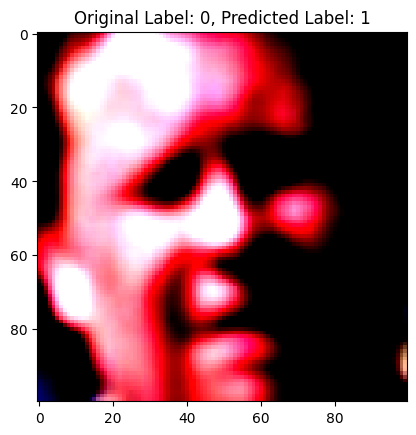

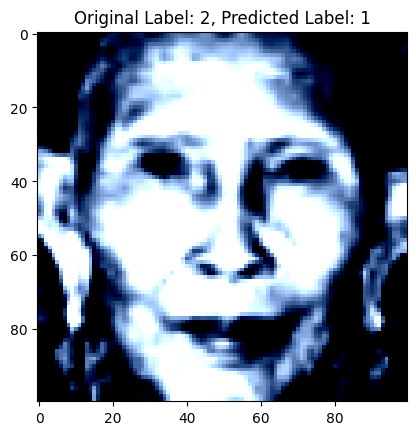

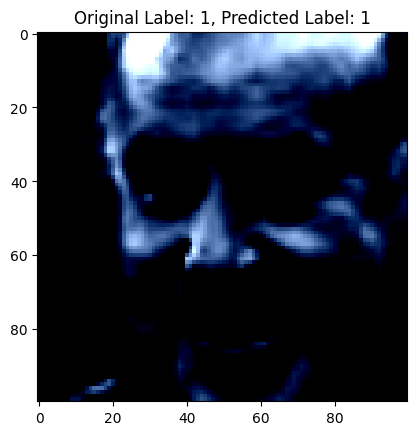

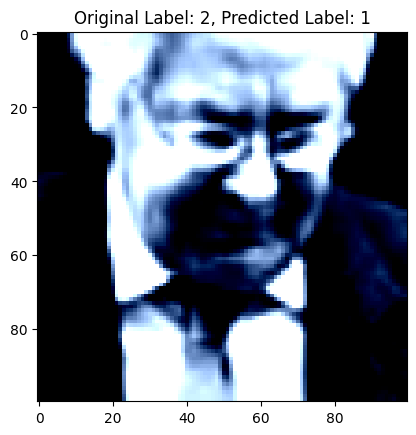

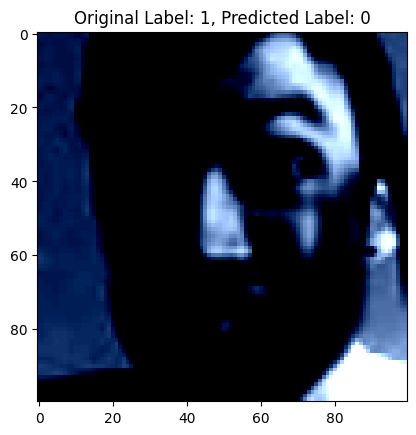

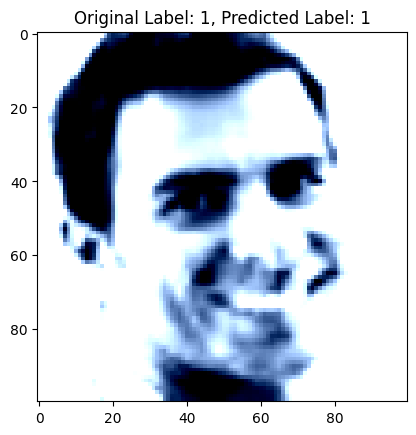

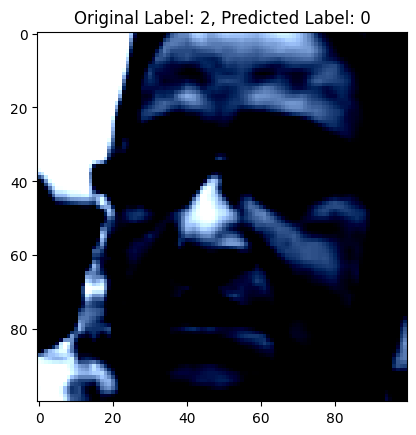

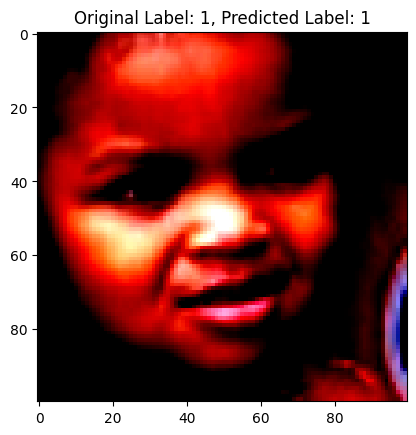

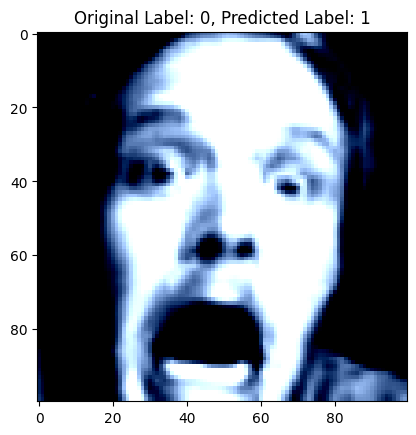

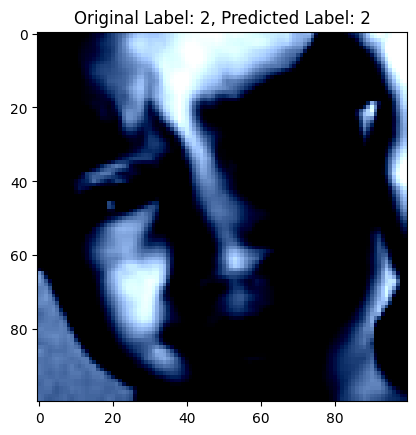

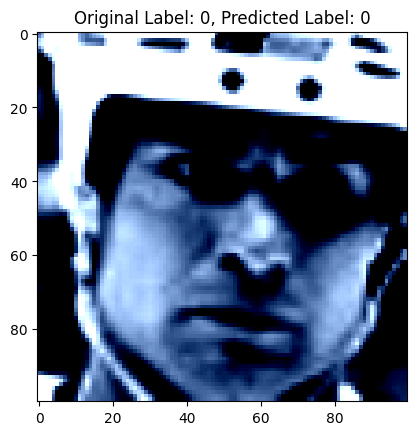

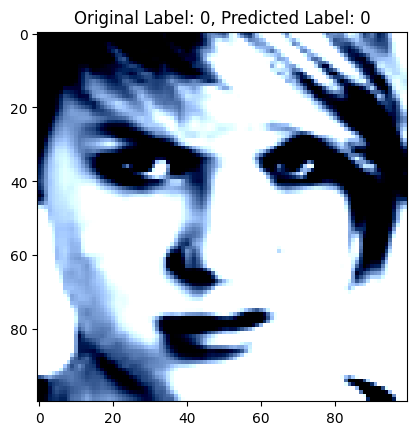

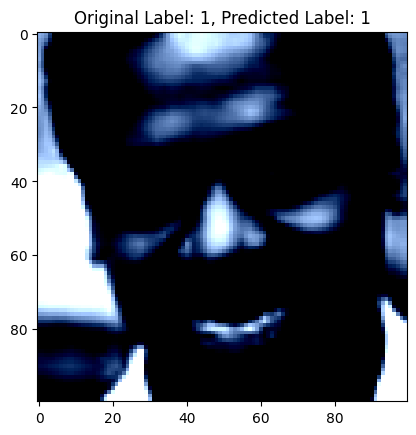

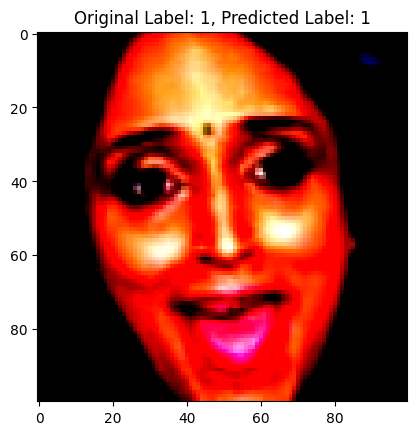

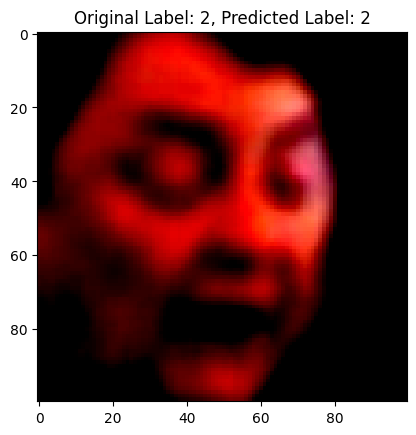

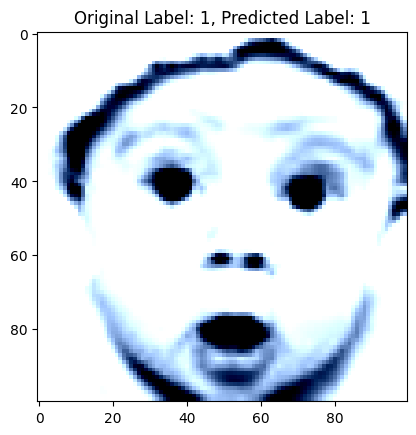

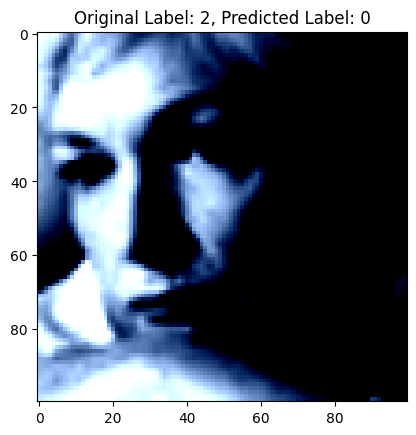

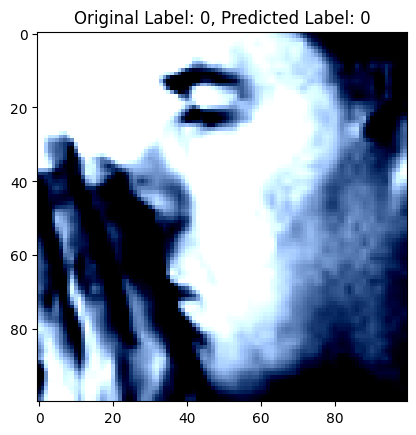

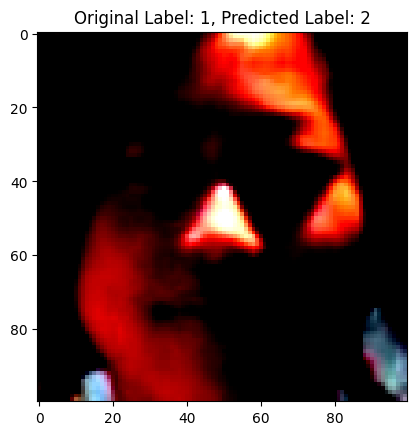

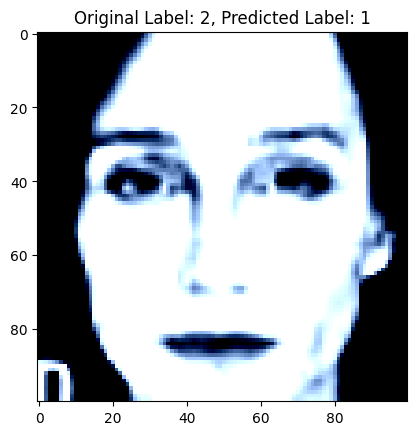

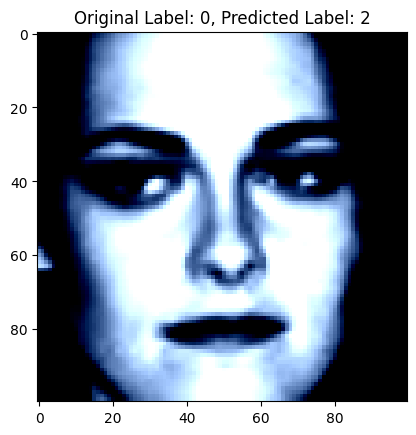

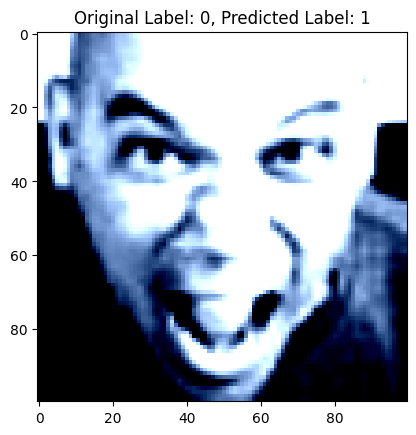

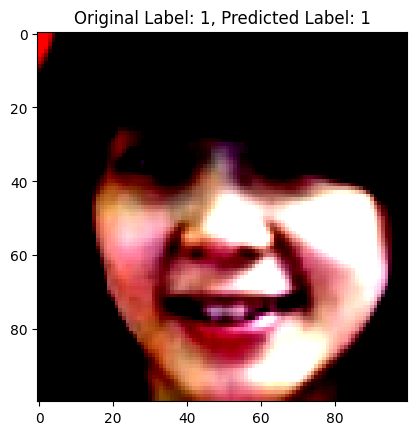

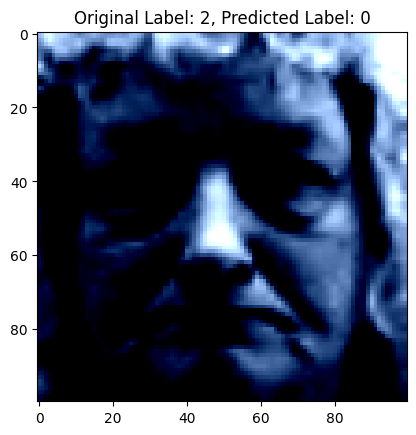

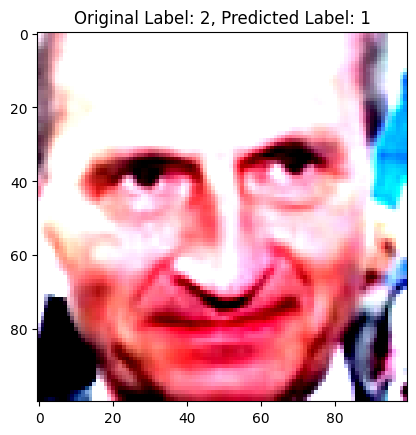

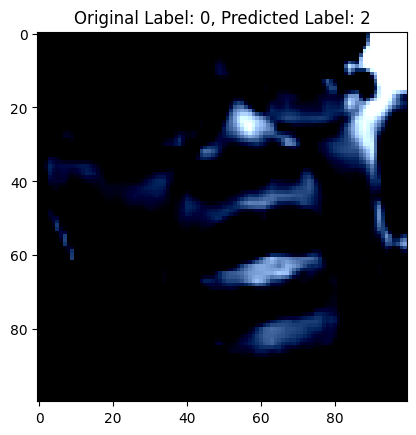

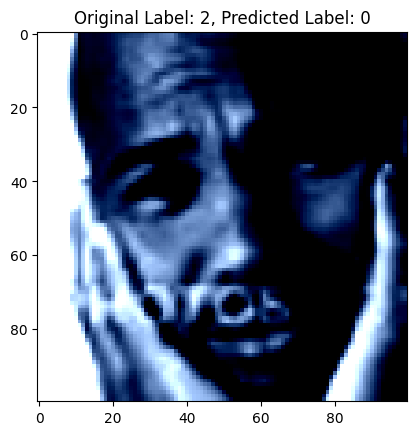

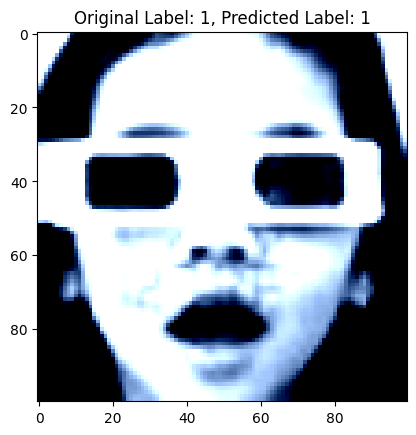

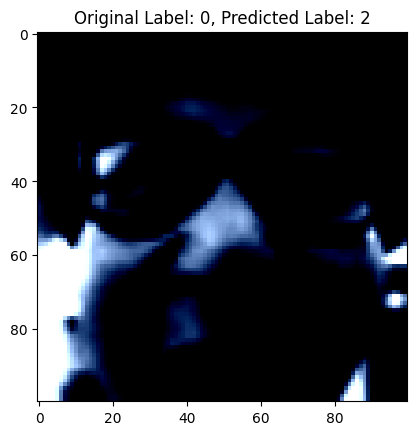

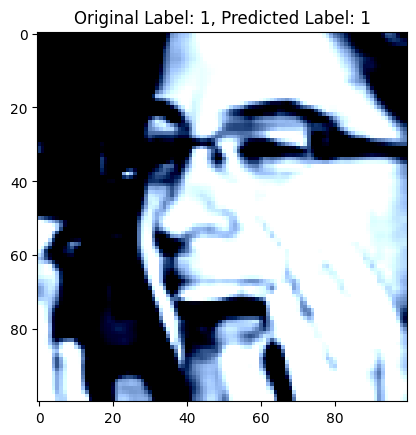

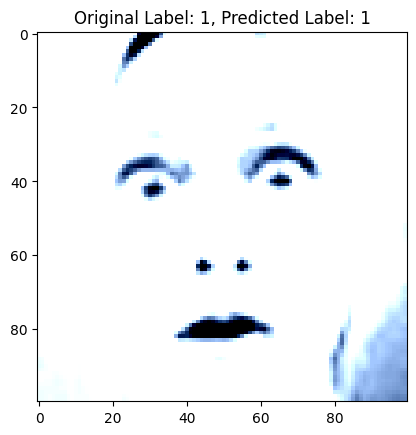

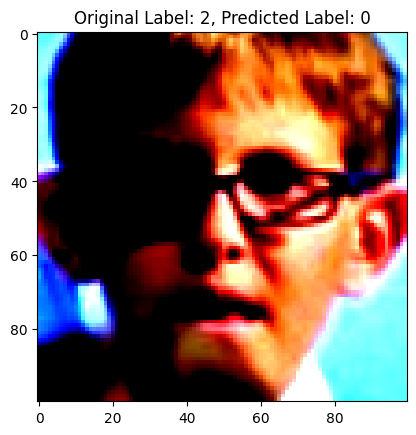

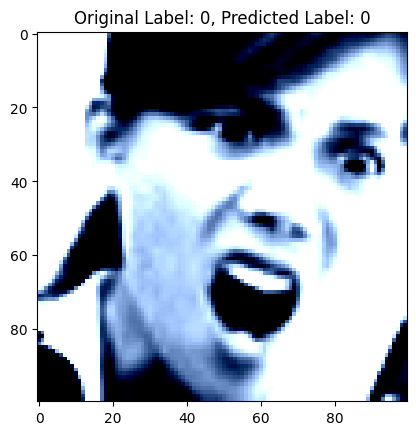

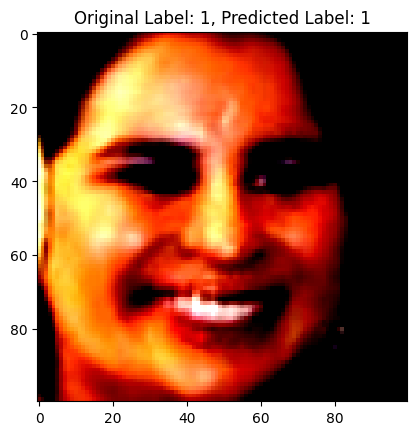

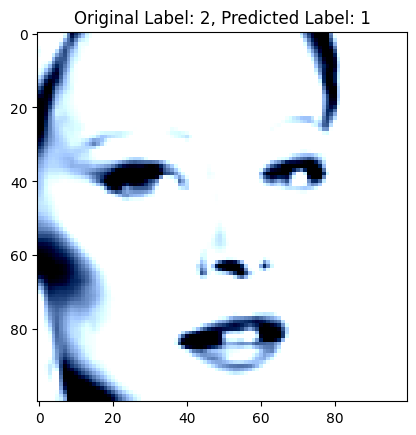

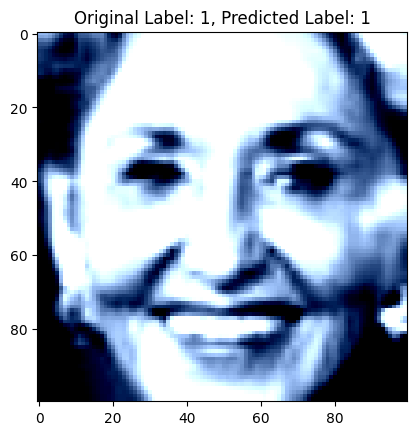

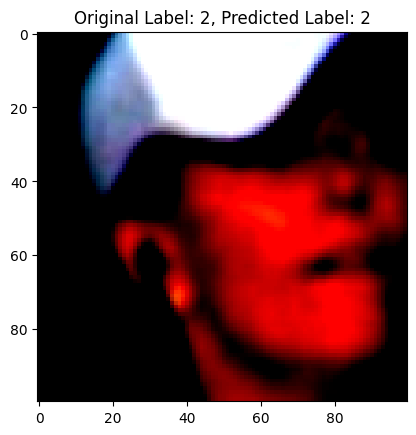

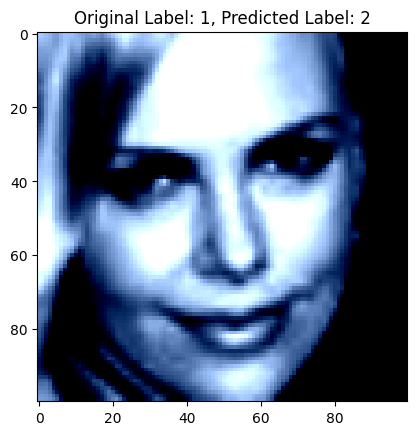

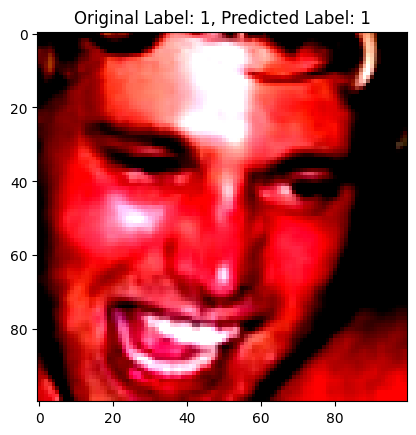

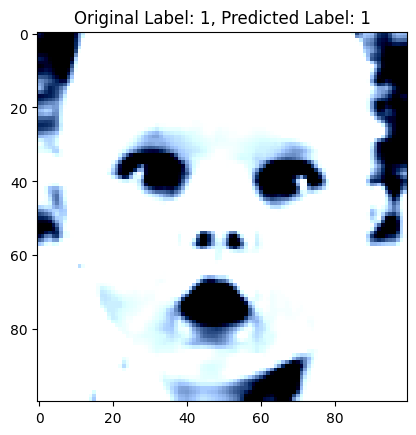

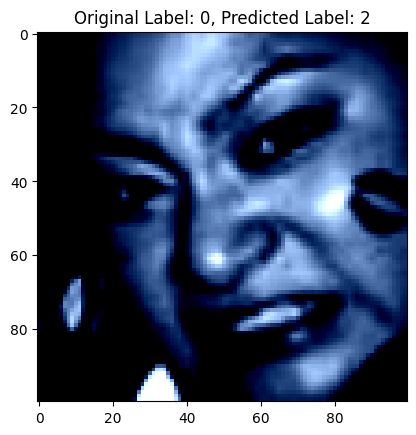

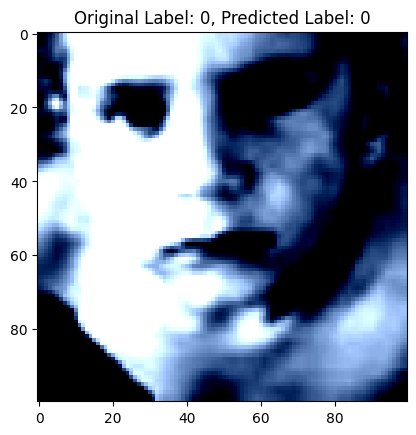

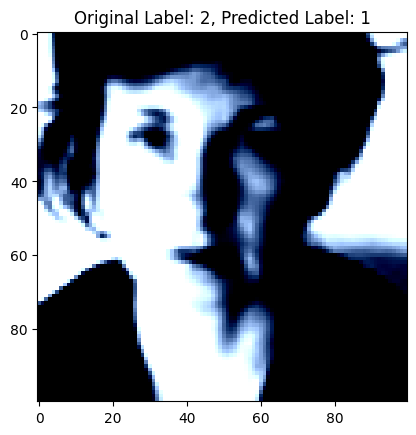

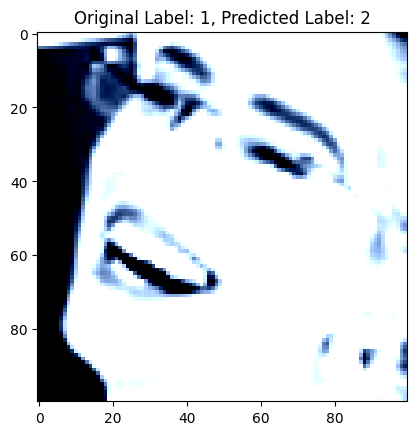

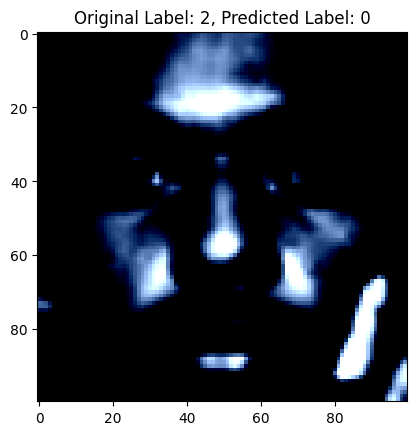

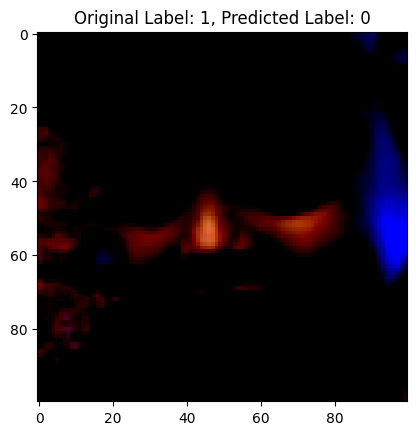

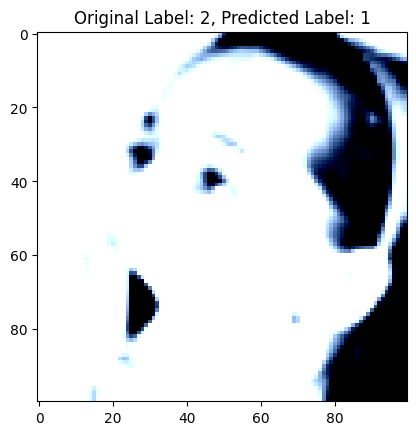

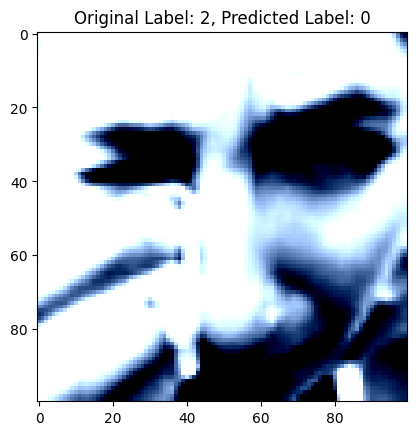

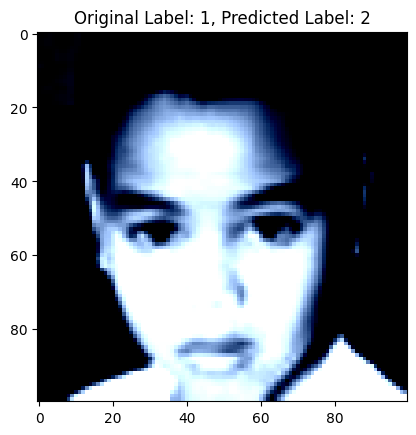

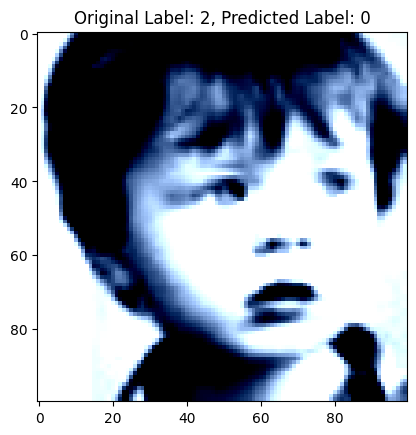

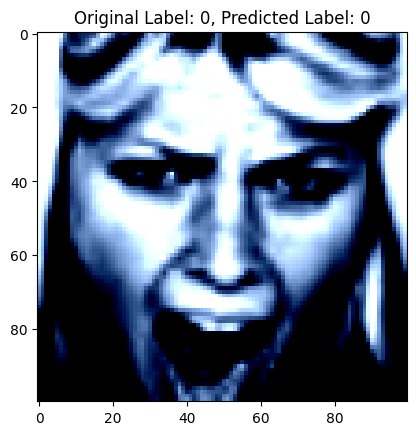

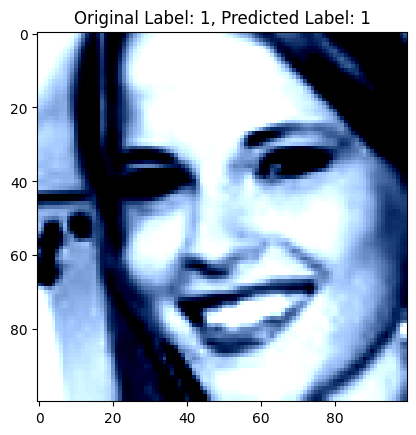

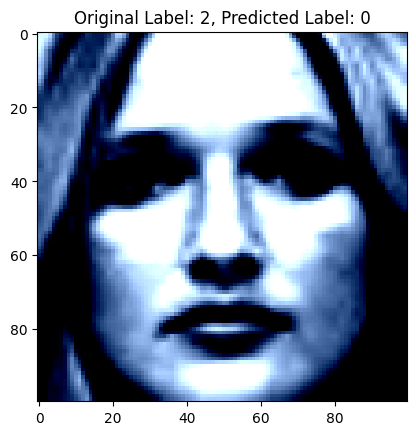

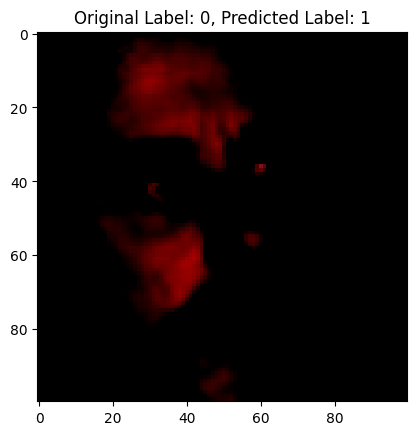

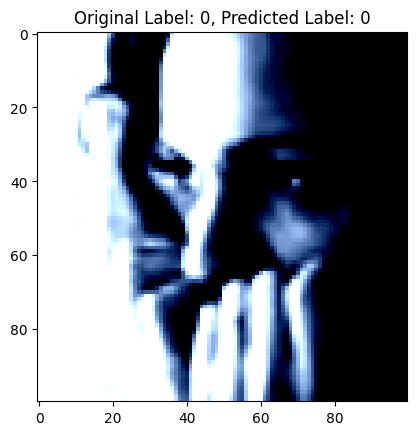

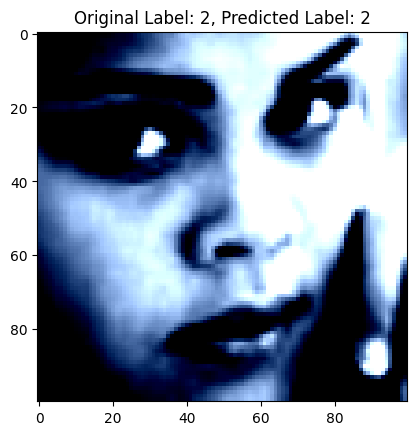

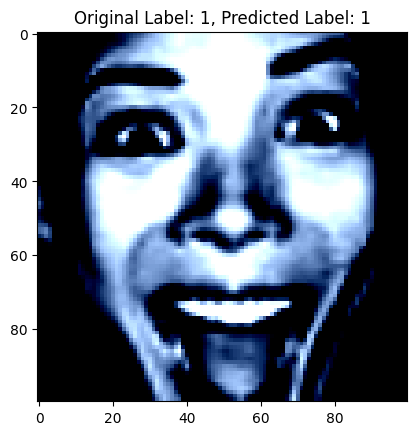

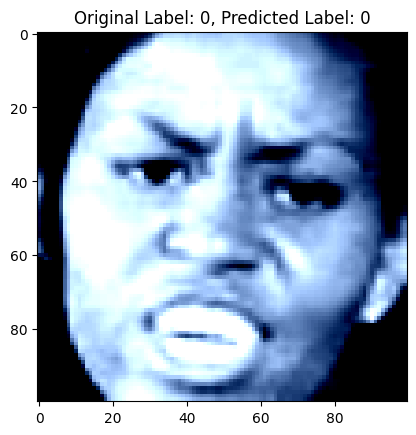

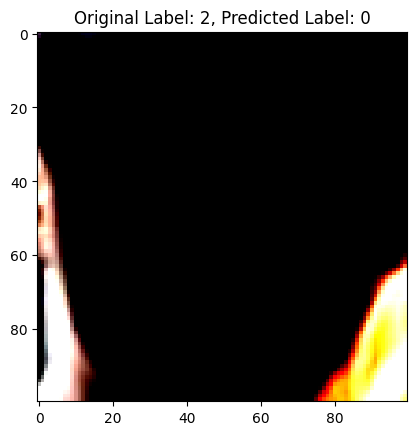

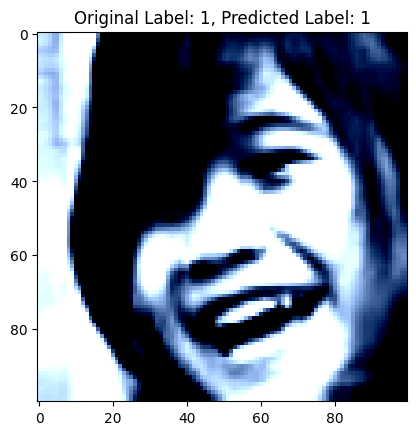

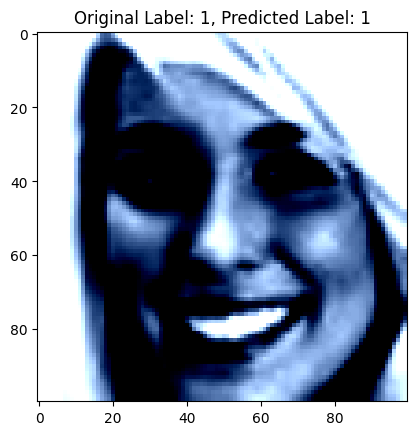

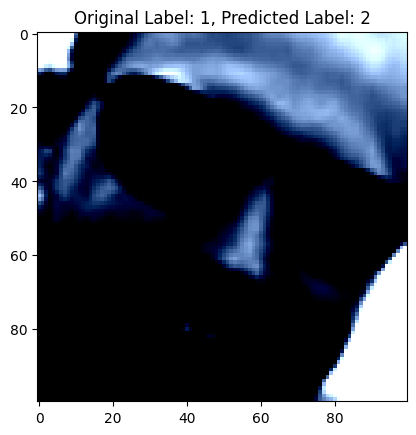

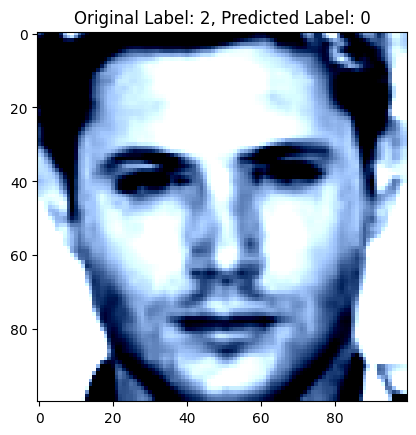

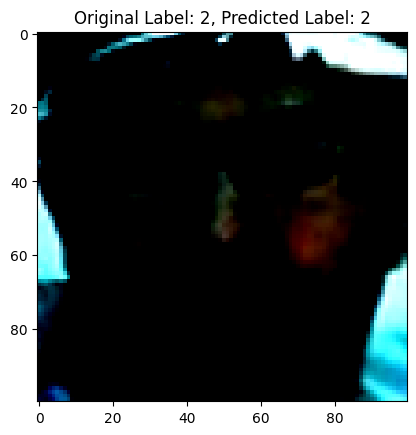

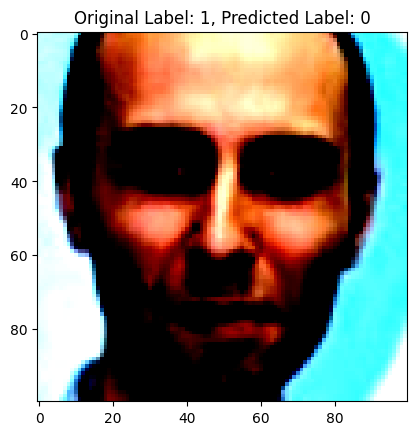

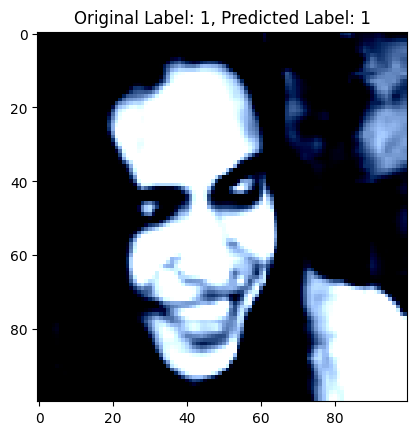

KeyboardInterrupt: ignored

In [25]:
import matplotlib.pyplot as plt

def visualize_predictions(model, dataloader, device):
    model.eval()  # Asegúrate de que el modelo esté en modo de evaluación
    with torch.no_grad():
        for batch in dataloader:
            X, y = batch
            X, y = X.to(device), y.to(device)
            y_hat = model(X)

            for i in range(len(y)):
                sample_image = X[i].cpu().numpy()  # Convierte la imagen a numpy (asegúrate de moverla a la CPU)
                sample_label = y[i].item()  # Obtiene la etiqueta original como un valor escalar
                predicted_label = torch.argmax(y_hat[i]).item()  # Obtiene la etiqueta predicha
                plt.imshow(np.transpose(sample_image, (1, 2, 0)))  # Cambia las dimensiones para ser (altura, ancho, canales)
                plt.title(f"Original Label: {sample_label}, Predicted Label: {predicted_label}")
                plt.show()

# Luego, puedes llamar a esta función después de entrenar tu modelo, por ejemplo:
# regNet = models.regnet_x_400mf(weights=None)
# fit(regNet, dataloader)
visualize_predictions(regNet, dataloader['test'], device)
